In [2]:
 !pip install librosa soundfile numpy pandas matplotlib scipy SpeechRecognition git+https://github.com/openai/whisper.git torch

import librosa
import soundfile as sf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
from google.colab import drive
import speech_recognition as sr
import whisper



  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-hkhjnwne
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-hkhjnwne
  Resolved https://github.com/openai/whisper.git to commit 517a43ecd132a2089d85f4ebc044728a71d49f6e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━

In [4]:
# Mount Google Drive
drive.mount('/content/drive')

# Path to the directory containing WAV files
wav_files_dir = '/content/drive/MyDrive/LibriSpeech/train-clean-100-wav'

# Function to get a random WAV file from the dataset
def get_random_wav_file(dataset_path):
    # Collect all WAV files in the dataset
    wav_files = []
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.endswith('.wav'):
                wav_files.append(os.path.join(root, file))

    # Select a random WAV file
    if wav_files:
        return random.choice(wav_files)
    else:
        raise FileNotFoundError("No WAV files found in the dataset.")

# Function to extract acoustic features
def extract_acoustic_features(file_path):
    y, sr = librosa.load(file_path, sr=None)

    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    # Extract pitch and tone
    pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr)
    pitch = np.mean(pitches)

    # Extract volume (RMS energy)
    rms = librosa.feature.rms(y=y)
    volume = np.mean(rms)

    return mfccs, pitch, volume



Mounted at /content/drive


In [5]:
def plot_acoustic_features(mfccs, pitch, volume, y, sr, **kwargs):
    pitches = kwargs.get('pitches')
    rms = kwargs.get('rms')
    plt.figure(figsize=(18, 6))

    # Plot MFCCs
    plt.subplot(1, 3, 1)
    librosa.display.specshow(mfccs, x_axis='time', sr=sr, cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title('MFCCs')
    plt.xlabel('Time (s)')
    plt.ylabel('MFCC Coefficients')

    # Plot Pitch
    plt.subplot(1, 3, 2)
    # Check if pitches is available before plotting
    if pitches is not None:
        plt.plot(librosa.times_like(pitches), np.mean(pitches, axis=0), label='Pitch', color='b')
    plt.title('Pitch Contour')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.legend()

    # Plot Volume (RMS Energy)
    plt.subplot(1, 3, 3)
    # Check if rms is available before plotting
    if rms is not None:
        plt.plot(librosa.times_like(rms), rms[0], label='Volume', color='g')
    plt.title('Volume (RMS Energy)')
    plt.xlabel('Time (s)')
    plt.ylabel('RMS Energy')
    plt.legend()

    plt.tight_layout()
    plt.show()

def noise_filtering(y, sr):
    # Apply a simple noise reduction filter (spectral gating)
    y_clean = librosa.effects.preemphasis(y)
    return y_clean

# Function to plot original vs filtered audio
def plot_original_vs_filtered(y, y_clean, sr):
    plt.figure(figsize=(14, 6))

    # Plot the original signal
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(y, sr=sr, color='b')
    plt.title('Original Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # Plot the filtered signal
    plt.subplot(2, 1, 2)
    librosa.display.waveshow(y_clean, sr=sr, color='g')
    plt.title('Filtered Signal (Noise Reduced)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    plt.tight_layout()
    plt.show()


100%|███████████████████████████████████████| 139M/139M [00:02<00:00, 68.4MiB/s]


Randomly selected WAV file: /content/drive/MyDrive/LibriSpeech/train-clean-100-wav/5808/48608/5808-48608-0060.wav
Acoustic Analysis:


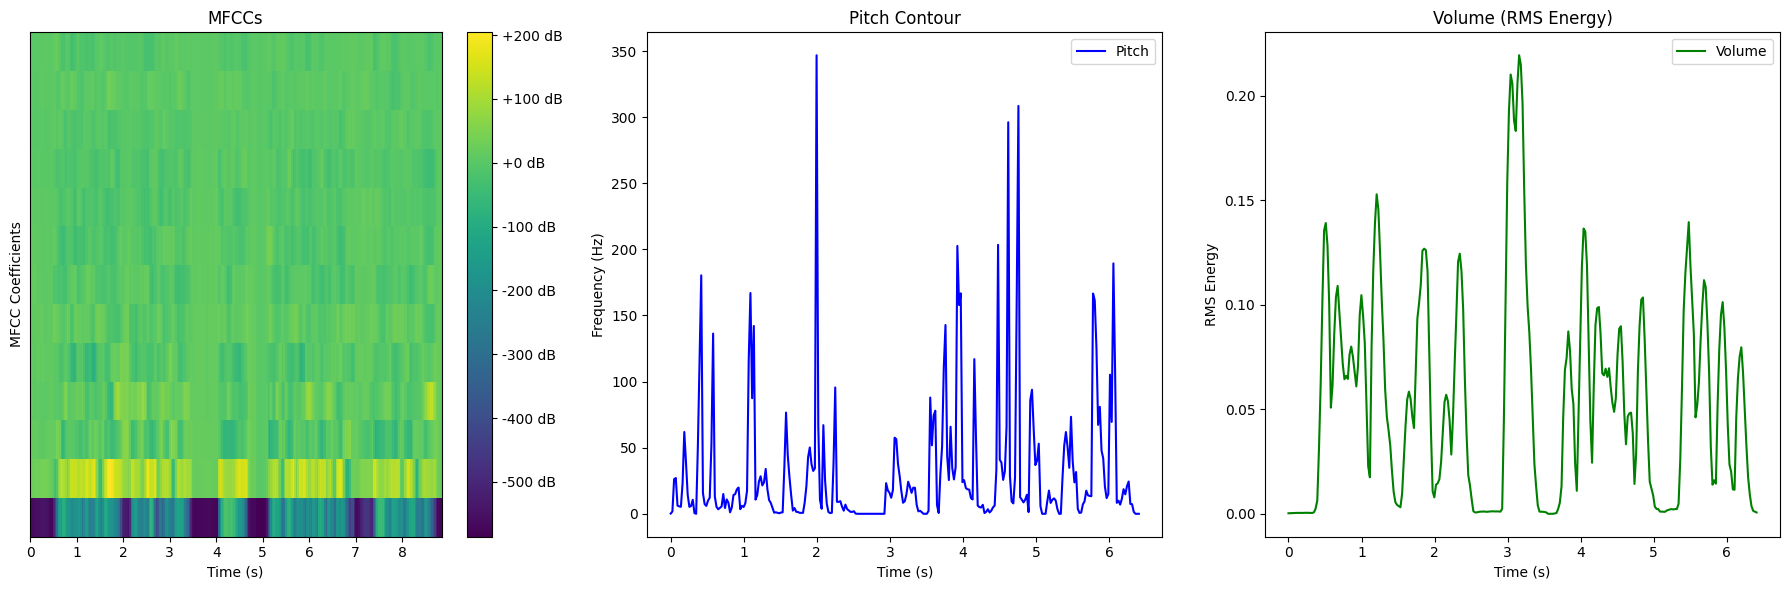

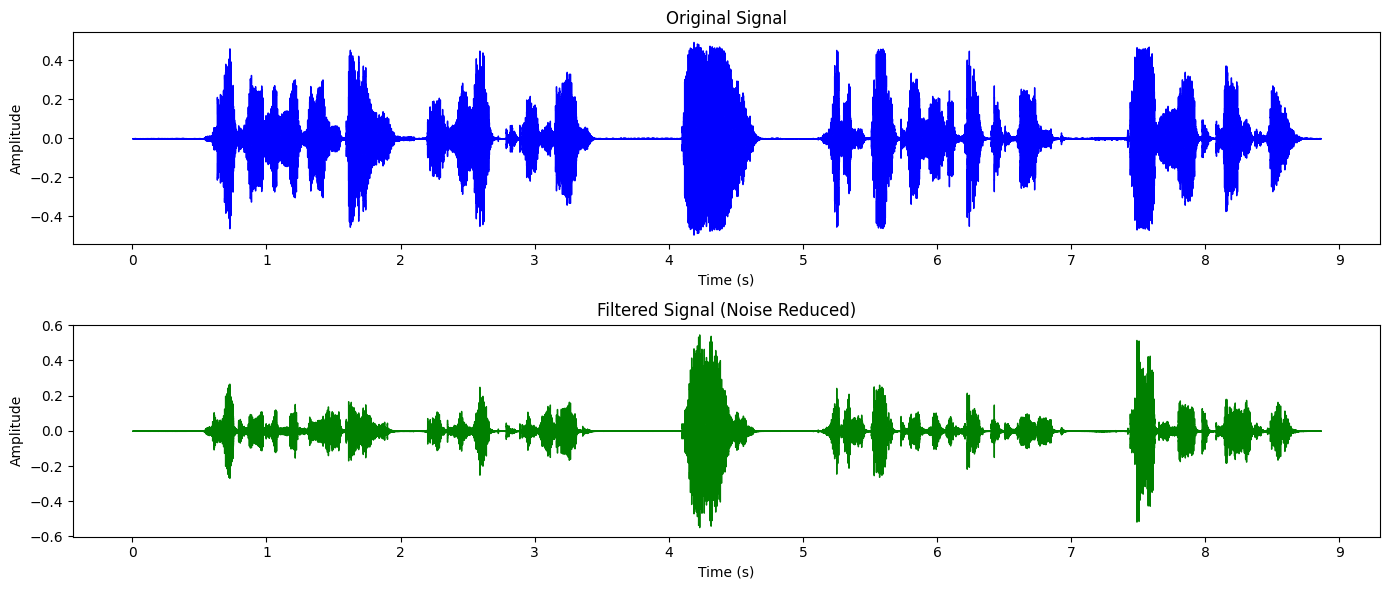

/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription:  So I told him the whole story, and he wept and said, by Allah, had a style told me the fact at first, I had not pressed thee.


In [6]:
# Function to perform noise filtering
def noise_filtering(y, sr):
    # Apply a simple noise reduction filter (spectral gating)
    y_clean = librosa.effects.preemphasis(y)
    return y_clean

# Load the Whisper model for ASR
model = whisper.load_model("base")  # Use "small", "medium", or "large" for better accuracy

# Function to transcribe audio using Whisper
def transcribe_with_whisper(file_path):
    result = model.transcribe(file_path)
    return result["text"]

# Main function to perform all steps
def perform_all_steps():
    # Step 1: Get a random WAV file
    sample_wav_file = get_random_wav_file(wav_files_dir)
    print(f"Randomly selected WAV file: {sample_wav_file}")

    # Step 2: Acoustic Analysis
    mfccs, pitch, volume = extract_acoustic_features(sample_wav_file)
    print("Acoustic Analysis:")

    # Load audio to get y and sr for plotting
    y, sr = librosa.load(sample_wav_file, sr=None)

    # Extract pitches and rms for plotting
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)

    # Now call plot_acoustic_features with the extracted data
    plot_acoustic_features(mfccs, pitch, volume, y, sr, pitches=pitches, rms=rms)

    # Step 3: Noise Filtering
    y, sr = librosa.load(sample_wav_file, sr=None)
    y_clean = noise_filtering(y, sr)

    plot_original_vs_filtered(y, y_clean, sr)


    # Step 4: Speech Recognition (ASR)
    transcription = transcribe_with_whisper(sample_wav_file)
    print(f"Transcription: {transcription}")

# Run all steps
perform_all_steps()

In [7]:
!pip install librosa numpy pandas scikit-learn tensorflow soundfile
!apt-get install -qq portaudio19-dev libportaudio2 libportaudiocpp0
!pip install sounddevice

import os
import librosa
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.utils import to_categorical
import sounddevice as sd
import soundfile as sf

Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 126209 files and directories currently installed.)
Preparing to unpack .../libportaudio2_19.6.0-1.1_amd64.deb ...
Unpacking libportaudio2:amd64 (19.6.0-1.1) ...
Selecting previously unselected package libportaudiocpp0:amd64.
Preparing to unpack .../libportaudiocpp0_19.6.0-1.1_amd64.deb ...
Unpacking libportaudiocpp0:amd64 (19.6.0-1.1) ...
Selecting previously unselected package portaudio19-dev:amd64.
Preparing to unpack .../portaudio19-dev_19.6.0-1.1_amd64.deb ...
Unpacking portaudio19-dev:amd64 (19.6.0-1.1) ...
Setting up libportaudio2:amd64 (19.6.0-1.1) ...
Setting up libportaudiocpp0:amd64 (19.6.0-1.1) ...
Setting up portaudio19-dev:amd64 (19.6.0-1.1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.8) ...
/sbin/ldconfig.real: /usr/local/lib/libhwloc.so.15 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtcm.so.1 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc

In [8]:
# Define paths to your datasets
speech_dir = "/content/drive/MyDrive/RAVDESS/Audio_Speech_Actors_01-24"
song_dir = "/content/drive/MyDrive/RAVDESS/Audio_Song_Actors_01-24"

In [9]:
emotion_map = {
    1: 'neutral', 2: 'calm', 3: 'happy',
    4: 'sad', 5: 'angry', 6: 'fearful',
    7: 'disgust', 8: 'surprised'
}

def extract_features(file_path):
    """Extract audio features using librosa"""
    y, sr = librosa.load(file_path, sr=None)

    # MFCCs (40 coefficients)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)

    # Pitch and energy
    pitch = np.mean(librosa.yin(y, fmin=50, fmax=2000))
    energy = np.mean(librosa.feature.rms(y=y))

    # Chroma and spectral contrast
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr).T, axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr).T, axis=0)

    return np.hstack([mfccs, [pitch, energy], chroma, contrast])

def load_ravdess_dataset(base_path):
    """Load RAVDESS dataset with nested actor folders"""
    features = []
    labels = []

    for actor_folder in os.listdir(base_path):
        actor_path = os.path.join(base_path, actor_folder)
        if os.path.isdir(actor_path):
            for file in os.listdir(actor_path):
                if file.endswith('.wav'):
                    try:
                        # Parse emotion from filename (03-01-06-... -> emotion=6)
                        parts = file.split('-')
                        emotion_code = int(parts[2])
                        file_path = os.path.join(actor_path, file)

                        # Extract features
                        features.append(extract_features(file_path))
                        labels.append(emotion_code)
                    except Exception as e:
                        print(f"Skipping {file}: {str(e)}")

    return np.array(features), np.array(labels)

In [10]:

speech_path = "/content/drive/MyDrive/RAVDESS/Audio_Speech_Actors_01-24"
X_speech, y_speech = load_ravdess_dataset(speech_path)

song_path = "/content/drive/MyDrive/RAVDESS/Audio_Song_Actors_01-24"
X_song, y_song = load_ravdess_dataset(song_path)

# Combine datasets
X = np.vstack((X_speech, X_song))
y = np.concatenate((y_speech, y_song))

# Verify data
print(f"Total samples: {len(X)}")
print("Emotion distribution:")
unique, counts = np.unique(y, return_counts=True)
for code, count in zip(unique, counts):
    print(f"{emotion_map[code]}: {count} samples")


Total samples: 2452
Emotion distribution:
neutral: 188 samples
calm: 376 samples
happy: 376 samples
sad: 376 samples
angry: 376 samples
fearful: 376 samples
disgust: 192 samples
surprised: 192 samples


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Converts to 0-7

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# Reshape for LSTM (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [12]:
model = Sequential([
    LSTM(256, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.3),
    LSTM(128),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(len(emotion_map), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
print("Training model...")
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training model...
Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 24s 326ms/step - accuracy: 0.1822 - loss: 2.0113 - val_accuracy: 0.2648 - val_loss: 1.8783
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 315ms/step - accuracy: 0.2688 - loss: 1.8317 - val_accuracy: 0.2688 - val_loss: 1.8537
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 326ms/step - accuracy: 0.3104 - loss: 1.7458 - val_accuracy: 0.2627 - val_loss: 1.7972
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 326ms/step - accuracy: 0.3419 - loss: 1.6517 - val_accuracy: 0.3503 - val_loss: 1.6879
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 29s 468ms/step - accuracy: 0.3954 - loss: 1.5765 - val_accuracy: 0.3462 - val_loss: 1.7089
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 35s 374ms/step - accuracy: 0.3747 - loss: 1.5561 - val_accuracy: 0.3870 - val_loss: 1.5851
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 324ms/step - accuracy: 0.4158 - loss: 1.4786 - val_accuracy: 0.3829 - val_loss: 1.5742
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 314ms/step - accuracy: 0.4331 - loss:

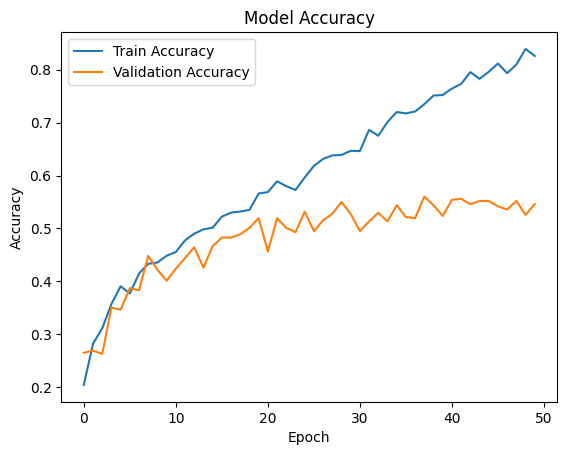

In [13]:
import matplotlib.pyplot as plt
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [30]:
import IPython.display as ipd
from google.colab import files

def analyze_uploaded_audio():
    # Upload WAV file
    uploaded = files.upload()
    file_name = next(iter(uploaded))

    # Play audio
    print("\nPlaying uploaded audio...")
    ipd.display(ipd.Audio(file_name))

    # Extract features
    features = extract_features(file_name)
    features_scaled = scaler.transform(features.reshape(1, -1))
    features_reshaped = features_scaled.reshape(1, features_scaled.shape[1], 1)

    # Predict emotion
    pred = model.predict(features_reshaped)
    emotion_code = le.inverse_transform([np.argmax(pred)])[0]
    print(f"\nPredicted Emotion: {emotion_map[emotion_code + 1]} (Confidence: {np.max(pred)*100:.2f}%)")

    # Transcribe with Whisper
    print("\nTranscription:")
    model_whisper = whisper.load_model("base")
    result = model_whisper.transcribe(file_name)
    print(result['text'])

# Run analysis
print("\nUpload a WAV file for emotion detection and transcription")
analyze_uploaded_audio()


Upload a WAV file for emotion detection and transcription


Saving recording(disgust).m4a to recording(disgust).m4a

Playing uploaded audio...


<ipython-input-9-c9fb438f294f>:9: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step

Predicted Emotion: disgust (Confidence: 96.35%)

Transcription:


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 The kids are talking by the door.
